# Comparison of all the supervised models
    All the hyperparmeters values were entered below.
    The data was scaled for KNN and SVM.
    The AUC/ROC was calculated.
    The Accuracy was calculated for each.
    The best model was picked and the Recall and Prcision was calculated.
    The feature importance was also calculated.

    1.) Naive Bayes
    2.) KNN
    3.) Logistic Regression
    4.) Random Forest
    5.) Support Vector Machine
    6.) Extreme Gradient Boost

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
X=pd.read_csv('cleaned_heart_data.csv',index_col=0)
y=X['target']
X=X.drop(['target'],axis=1)
X.head()

,age,sex,resting_bp,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_angina,oldpeak,num_major_vessels,chest_pain_1,chest_pain_2,chest_pain_3,resting_ecg_1,resting_ecg_2,thalium_stress_test_1,thalium_stress_test_2,thalium_stress_test_3,slope_1,slope_2
0,63,1,145,233,1,150,0,2.3,0,0,0,1,0,0,1,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,0,0,0,0,0,1,0,0,1
3,56,1,120,236,0,178,0,0.8,0,1,0,0,1,0,0,1,0,0,1
4,57,0,120,354,0,163,1,0.6,0,0,0,0,1,0,0,1,0,0,1


# Model comparison of ROC-AUC score

In [5]:
#ROC-AUC scores for all of our models.
print('\t   ROC/AUC\n\t score\t  std')
results = []
names = []
models = []

models.append(('NB', BernoulliNB()))
models.append(('KNN', make_pipeline(preprocessing.StandardScaler(), 
                                    KNeighborsClassifier(n_neighbors=42))))
models.append(('LR', LogisticRegression()))
models.append(('SVM', make_pipeline(preprocessing.StandardScaler(), 
                                    SVC(kernel='linear',C=100,gamma=1e-05))))

models.append(('RF', RandomForestClassifier(bootstrap=True,
                                            max_depth=2,
                                            min_samples_leaf=30,
                                            min_samples_split=5,
                                            max_features=4,
                                            n_estimators=5)))
models.append(('XGB',  XGBClassifier(bootstrap=True,subsample= 0.3,
                                     n_estimators=30,max_depth=2,
                                     learning_rate=0.3,
                                     colsample_bytree=0.15,
                                     colsample_bylevel=0.0001)))


for name, model in models:
    kfold = model_selection.KFold(n_splits = 3, random_state = 99)

    cv_results = model_selection.cross_val_score(model, X, y,
                                                cv = 3, 
                                                 scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

	   ROC/AUC
	 score	  std
NB:	0.9047 (0.0129)
KNN:	0.9047 (0.0176)
LR:	0.9123 (0.0114)
SVM:	0.9057 (0.0026)
RF:	0.8810 (0.0262)
XGB:	0.9047 (0.0201)


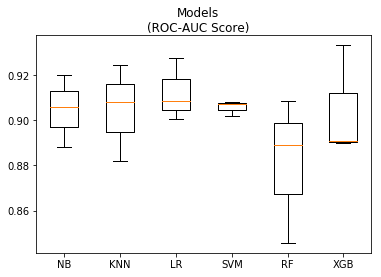

In [6]:
#Let's take a look at these ROC-AUC scores on a box plot
fig = plt.figure()
fig.suptitle('Models\n(ROC-AUC Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* LR has the best roc/auc score 
* SVM is the most stable for the ROC-AUC
* RF has the worst score and stability

------

# Model comparison of accuracy score

In [7]:
#Let's see the accuracy scores for all of our models. 
models = []
results = []
names = []
print('\t   Accuracy\n\t score\t  std')

models.append(('NB', BernoulliNB()))

models.append(('KNN', make_pipeline(preprocessing.StandardScaler(), 
                                    KNeighborsClassifier(n_neighbors=42))))

models.append(('LR', LogisticRegression()))

models.append(('SVM', make_pipeline(preprocessing.StandardScaler(), 
                                    SVC(kernel='linear',C=100,gamma=1e-05))))

models.append(('RF', RandomForestClassifier(bootstrap=True,
                                            max_depth=2,
                                            min_samples_leaf=30,
                                            min_samples_split=5,
                                            max_features=4,
                                            n_estimators=5)))

models.append(('XGB',  XGBClassifier(bootstrap=True,subsample= 0.3,
                                     n_estimators=30,max_depth=2,
                                     learning_rate=0.3,
                                     colsample_bytree=0.15,
                                     colsample_bylevel=0.0001)))


for name, model in models:
    kfold = model_selection.KFold(n_splits = 3, random_state = 99)
    cv_results = model_selection.cross_val_score(model, X, y,
                                                cv = 3, 
                                                 scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

	   Accuracy
	 score	  std
NB:	0.8152 (0.0093)
KNN:	0.8350 (0.0260)
LR:	0.8218 (0.0214)
SVM:	0.8086 (0.0233)
RF:	0.7921 (0.0583)
XGB:	0.8482 (0.0373)


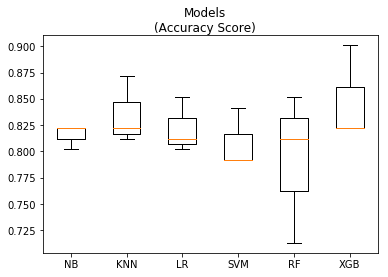

In [8]:
#Let's take a look at the Accuracy scores on a box plot
fig = plt.figure()
fig.suptitle('Models\n(Accuracy Score)')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* XGB has the highest accuracy score 
* NB is the most stable

# Evaluation of the best model - XGB

In [9]:
best_model = XGBClassifier(bootstrap=True,subsample= 0.3,
                                     n_estimators=30,max_depth=2,
                                     learning_rate=0.3,
                                     colsample_bytree=0.15,
                                     colsample_bylevel=0.0001)
best_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=True,
       colsample_bylevel=0.0001, colsample_bytree=0.15, gamma=0,
       learning_rate=0.3, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=30, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.3)

In [10]:
for var in ['precision','recall']:
    print('\n\t {} \n\t score\t  stdev'.format(var))
    results = []
    names = []
    models = []

    models.append(('XGB', XGBClassifier(bootstrap=True,
                    subsample= 0.3,
                           n_estimators=30,
                           max_depth=2,
                           learning_rate=0.3,
                           colsample_bytree=0.15,
                           colsample_bylevel=0.0001)))


    for name, model in models:
        kfold = model_selection.KFold(n_splits = 3, random_state = 99)

        cv_results = model_selection.cross_val_score(model, X, y,cv = 3,scoring = var)
        
        results.append(cv_results)
        names.append(name)
        msg = "%s:\t%.4f (%.4f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)


	 precision 
	 score	  stdev
XGB:	0.8552 (0.0735)

	 recall 
	 score	  stdev
XGB:	0.8788 (0.0171)


*  Precision(positive predictive value) TP/(TP + FP) - What percent of positive predictions were correct?  85.52%   TP/(TP + FP)

*  Recall(sensitivity) TP/(TP + FN) - What percent of the positive cases did you catch?  87.88%   

In [13]:
#F1score= 2 * (precision*recall) / (precision+recall)
Fmeasure = 2*(0.8552 * 0.8788) / (0.8552 + 0.8788)
print('F1score =  {0:.2%}'.format(Fmeasure))

F1score =  86.68%


* Here are ROC curves for a holdout of 10%,15%,20%,25% percents

In [14]:
#If we use a hold out of 10% we can plot the ROC curve
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.10)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.15)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.20)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.25)

best_model.fit(X_train1,y_train1)
best_model.fit(X_train2,y_train2)
best_model.fit(X_train3,y_train3)
best_model.fit(X_train4,y_train4)

ypred_train1 = best_model.predict_proba(X_train1)[:, 1]
ypred_test1 = best_model.predict_proba(X_test1)[:, 1]
ypred_train2 = best_model.predict_proba(X_train2)[:, 1]
ypred_test2 = best_model.predict_proba(X_test2)[:, 1]
ypred_train3 = best_model.predict_proba(X_train3)[:, 1]
ypred_test3 = best_model.predict_proba(X_test3)[:, 1]
ypred_train4 = best_model.predict_proba(X_train4)[:, 1]
ypred_test4 = best_model.predict_proba(X_test4)[:, 1]

fpr1, tpr1, thresholds = roc_curve(y_train1, ypred_train1)
fpr_1, tpr_1, thresholds = roc_curve(y_test1, ypred_test1)

fpr2, tpr2, thresholds = roc_curve(y_train2, ypred_train2)
fpr_2, tpr_2, thresholds = roc_curve(y_test2, ypred_test2)

fpr3, tpr3, thresholds = roc_curve(y_train3, ypred_train3)
fpr_3, tpr_3, thresholds = roc_curve(y_test3, ypred_test3)

fpr4, tpr4, thresholds = roc_curve(y_train4, ypred_train4)
fpr_4, tpr_4, thresholds = roc_curve(y_test4, ypred_test4)



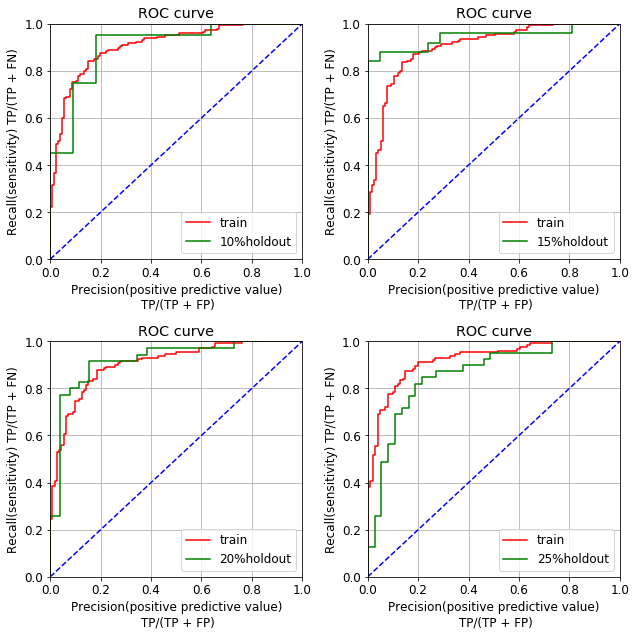

In [15]:
plt.rcParams['font.size'] = 12
plt.figure(figsize=(9,9))

plt.subplot(2, 2, 1)
plt.plot(fpr1, tpr1,color='r')
plt.plot(fpr_1, tpr_1,color='g',label="10%holdout")
plt.legend(['train', '10%holdout'])
plt.title('ROC curve')
plt.xlabel('Precision(positive predictive value)\n TP/(TP + FP)')
plt.ylabel('Recall(sensitivity) TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.grid(True)
plt.plot([0, 1], [0, 1],'b--')
plt.tight_layout()

plt.subplot(2, 2, 2)
plt.plot(fpr2, tpr2,color='r')
plt.plot(fpr_2, tpr_2,color='g', label="15%holdout")
plt.legend(['train', '15%holdout'])
plt.title('ROC curve')
plt.xlabel('Precision(positive predictive value)\n TP/(TP + FP)')
plt.ylabel('Recall(sensitivity) TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.grid(True)
plt.plot([0, 1], [0, 1],'b--')
plt.tight_layout()

plt.subplot(2, 2, 3)
plt.plot(fpr3, tpr3,color='r')
plt.plot(fpr_3, tpr_3,color='g', label="20%holdout")
plt.legend(['train', '20%holdout'])
plt.title('ROC curve')
plt.xlabel('Precision(positive predictive value)\n TP/(TP + FP)')
plt.ylabel('Recall(sensitivity) TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.grid(True)
plt.plot([0, 1], [0, 1],'b--')
plt.tight_layout()

plt.subplot(2, 2, 4)
plt.plot(fpr4, tpr4,color='r')
plt.plot(fpr_4, tpr_4,color='g', label="25%holdout")
plt.legend(['train', '25%holdout'])
plt.title('ROC curve')
plt.xlabel('Precision(positive predictive value)\n TP/(TP + FP)')
plt.ylabel('Recall(sensitivity) TP/(TP + FN)')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.tight_layout()
plt.grid(True)
plt.plot([0, 1], [0, 1],'b--')
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-")

---

# Feature Importance for the best model, XGB

In [20]:
best_model.fit(X,y)
xgb_importance=pd.DataFrame(list(best_model.get_booster().get_score(importance_type='weight').items()))

In [21]:
xgb_fea_imp=pd.DataFrame(list(best_model.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                   feature  importance
13                slope_1           5
11                    sex           5
9             cholesterol           5
1            chest_pain_2           4
4                 slope_2           4
5                 oldpeak           4
7          max_heart_rate           4
0         exercise_angina           3
16                    age           3
2   thalium_stress_test_2           3
10  thalium_stress_test_3           2
3              resting_bp           2
8       num_major_vessels           2
6            chest_pain_3           1
12    fasting_blood_sugar           1
14           chest_pain_1           1
15          resting_ecg_1           1


<Figure size 1152x432 with 0 Axes>

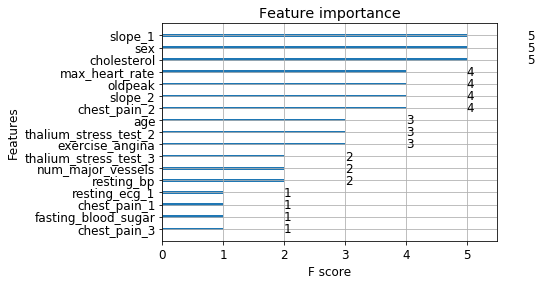

''

In [22]:
plt.figure(figsize=(16,6))
from xgboost import plot_importance
plot_importance(best_model)
plt.show()
;

The most significant features to predict heart disease for this model are slope1, sex and cholesterol. 

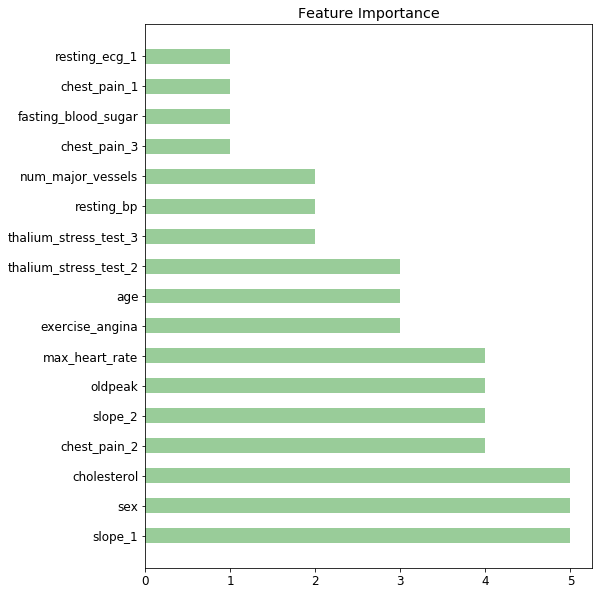

In [23]:
index = np.arange(len(xgb_fea_imp))
fig = plt.figure(figsize=(8, 10))
plt.subplot('111')
bar_width = 0.5
plt.xticks(size = 12)
plt.yticks(size = 12)
rects = plt.barh(index, xgb_fea_imp["importance"], bar_width, alpha=0.4, color='g', label='Main')
plt.title('Feature Importance')
plt.yticks(index, xgb_fea_imp["feature"])

plt.show()
